In [1]:
#Initialization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
import scipy.interpolate as interp
import scipy.special as sf
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
import scipy.integrate as integ

The optimal angle is 35.589694103834844 degrees.
The maximum range is 0.514043886897955.


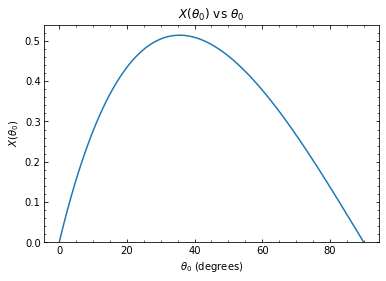

In [2]:
#Make finely spaced array of angles
theta_not = np.linspace(10**(-3), np.pi/2, 10**(3))

#Make Y(s) function
def Y(s, theta_not) :
    return (np.sin(theta_not)+1)*(1-np.exp(-s)) - s

#Make array of s values for when projectile hits ground for different angles
s = np.zeros_like(theta_not)
for i in range(theta_not.size) :  
    s[i] = opt.brentq(lambda s : Y(s, theta_not[i]), 10**(-15), 3)

#Make spline of X(theta_not) 
X = np.cos(theta_not)*(1-np.exp(-s))
X_spline = interp.InterpolatedUnivariateSpline(theta_not, X)

#Plot X(theta_not)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta_not*180/np.pi, X)
ax.set_title(r'$X(\theta_0)$ vs $\theta_0$')
ax.set_ylabel(r'$X(\theta_0)$')
ax.set_xlabel(r'$\theta_0$ (degrees)')
plt.ylim(0)

#Find the maximum of the spline
dX_spline = X_spline.derivative()
theta_not_opt = opt.brentq(dX_spline, 0, np.pi/2.)

#Print results
print('The optimal angle is', theta_not_opt*180/np.pi, 'degrees.')
print('The maximum range is '+str(X_spline(theta_not_opt))+'.')